<a href="https://colab.research.google.com/github/JithmiS/ml_7_assignment/blob/master/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_csv = pd.read_csv('/content/train.csv', parse_dates = ['pickup_time','drop_time']).drop(columns='tripid')

In [ ]:
test = pd.read_csv('/content/test.csv', parse_dates = ['pickup_time','drop_time'])

In [ ]:
train_csv['fare'] = train_csv.fare.fillna(train_csv.fare.mean())
train_csv['additional_fare'] = train_csv.additional_fare.fillna(train_csv.additional_fare.mean())
train_csv['duration'] = train_csv.duration.fillna(train_csv.duration.mean())
train_csv['meter_waiting_till_pickup'] = train_csv.meter_waiting_till_pickup.fillna(train_csv.meter_waiting_till_pickup.mean())
train_csv['meter_waiting'] = train_csv.meter_waiting.fillna(train_csv.meter_waiting.mean())
train_csv['meter_waiting_fare'] = train_csv.meter_waiting_fare.fillna(train_csv.meter_waiting_fare.mean())

In [ ]:
# Absolute difference time
train_csv['abs_time'] = (train_csv['drop_time'] - train_csv['pickup_time']).abs()
test['abs_time'] = (test['drop_time'] - test['pickup_time']).abs()

In [ ]:
#Absolute difference in latitude and longitude
train_csv['abs_lat_diff'] = (train_csv['drop_lat'] - train_csv['pick_lat']).abs()
train_csv['abs_lon_diff'] = (train_csv['drop_lon'] - train_csv['pick_lon']).abs()

In [ ]:
train_csv['label'] = train_csv['label'].map({'correct':1,'incorrect':0})

In [ ]:
train_csv = train_csv.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)

In [ ]:
# Create absolute differences
test['abs_lat_diff'] = (test['drop_lat'] - test['pick_lat']).abs()
test['abs_lon_diff'] = (test['drop_lon'] - test['pick_lon']).abs()

In [ ]:
# Save the id for submission
test_id = list(test.pop('tripid'))

In [ ]:
test = test.drop(['pickup_time', 'drop_time', 'pick_lat','pick_lon', 'drop_lat', 'drop_lon'], axis=1)
train_csv['time'] = (train_csv['abs_time'].dt.seconds.astype(int))
test['time'] = (test['abs_time'].dt.seconds.astype(int))
train_csv['distance'] = ((((train_csv['abs_lat_diff'])**2 + (train_csv['abs_lon_diff'])**2)**0.5)).abs()
test['distance'] = ((((test['abs_lat_diff'])**2 + (test['abs_lon_diff'])**2)**0.5)).abs()
train_csv = train_csv.drop(['abs_lat_diff','abs_lon_diff'], axis=1)
test = test.drop(['abs_lat_diff','abs_lon_diff'], axis=1)

In [ ]:
train_csv = train_csv.drop(['abs_time'], axis=1)
test = test.drop(['abs_time'], axis=1)

In [ ]:
train_csv = train_csv.drop(['meter_waiting_till_pickup'], axis=1)
test = test.drop(['meter_waiting_till_pickup'], axis=1)

In [ ]:
predictors = train_csv.drop(['label'], axis=1)
target = train_csv['label']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train

,additional_fare,duration,meter_waiting,meter_waiting_fare,fare,time,distance
12974,10.5,1220.0,301.0,0.0000,230.71,1260,0.044885
6263,5.0,1380.0,738.0,43.0254,211.22,1380,0.000215
6042,10.5,453.0,74.0,4.3142,86.72,480,0.011898
14959,10.5,2315.0,284.0,0.0000,545.34,2340,0.111772
4402,10.5,763.0,67.0,0.0000,208.39,780,0.043374
...,...,...,...,...,...,...,...
9225,10.5,758.0,319.0,7.1672,162.75,780,0.014577
13123,10.5,418.0,13.0,0.0000,154.11,420,0.030418
9845,10.5,721.0,90.0,0.0000,125.65,720,0.009007
10799,10.5,496.0,12.0,0.0000,401.66,540,0.026959


# Latest

In [ ]:
import tensorflow as tf

from tensorflow import keras


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	  keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=1)
test_loss, test_acc = model.evaluate(X_test, Y_test)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(test)
prediction

array([[0.9671774 ],
       [0.18169248],
       [0.9671774 ],
       ...,
       [0.9671774 ],
       [0.9671774 ],
       [0.9671774 ]], dtype=float32)

In [ ]:
rounded = [int(round(x[0])) for x in prediction]
print(rounded)

[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
test_csv_2 = pd.read_csv('/content/test.csv')
summission = pd.concat([test_csv_2['tripid'], pd.DataFrame(rounded)], axis=1)
summission.columns = ['tripid', 'prediction']
summission.to_csv('submission_NeuralNetwork.csv', encoding='utf-8', index = False)

In [ ]:
# Classification Models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold

# Performance Measures
from sklearn.metrics import accuracy_score

# Global Variables
rnd_state = 42
skfold = StratifiedKFold(n_splits=5)

# Models

Stochastic Gradient Descent (SGD) Classifier

In [ ]:
sgd_clf = SGDClassifier(max_iter=200, penalty = None, eta0=0.1, random_state=rnd_state, tol =1e-3)
sgd_clf.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=200, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_cross_scores = cross_val_score(sgd_clf, X_train, Y_train, cv=skfold, scoring="accuracy")
sgd_pred = sgd_clf.predict(X_test).astype(int)
sgd_scores = (sgd_cross_scores.mean() + accuracy_score (sgd_pred, Y_test))/2
sgd_scores

0.9160222356655194

Random Forest Classifier

In [ ]:
forest_clf = RandomForestClassifier(random_state=rnd_state, n_estimators=200)
forest_clf.fit (X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = [
    
    {
      'n_estimators': [200], 
      "max_depth": [None],
      "min_samples_split": [2, 3, 10],
      "min_samples_leaf": [1, 2, 4],
      "bootstrap": [False, True]
    },
   ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_forest_clf = GridSearchCV(forest_clf, param_grid, cv=skfold,
                           scoring='accuracy', return_train_score=True)

grid_forest_clf.fit(X_train, Y_train)
RFC_best = grid_forest_clf.best_estimator_

print(grid_forest_clf.best_score_)
RFC_best

0.951382823871907


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
grid_forest_clf.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
grid_forest_pred = grid_forest_clf.predict(X_test).astype(int)
grid_forest_scores = (grid_forest_clf.best_score_ + accuracy_score (grid_forest_pred, Y_test))/2
grid_forest_scores

0.9528450789906683

In [ ]:
from sklearn.metrics import roc_auc_score

forest_clf = RandomForestClassifier(bootstrap=True,
                                              min_samples_leaf=1,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200)
forest_clf.fit (X_train, Y_train)

# Performance sur le train
train_y_pred = forest_clf.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = forest_clf.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)

Performance sur le train :  0.8866197852323481
Performance sur le test :  0.8118180045303851


In [ ]:
forest_clf.predict(test)

array([1, 0, 1, ..., 1, 1, 1])

XGBoost

Best: -0.151685 using {'n_estimators': 360}
-0.163491 (0.008589) with: {'n_estimators': 100}
-0.159925 (0.008596) with: {'n_estimators': 120}
-0.157035 (0.008691) with: {'n_estimators': 140}
-0.155489 (0.008944) with: {'n_estimators': 160}
-0.154180 (0.009278) with: {'n_estimators': 180}
-0.153486 (0.009430) with: {'n_estimators': 200}
-0.152760 (0.009689) with: {'n_estimators': 220}
-0.152649 (0.009643) with: {'n_estimators': 240}
-0.152435 (0.009559) with: {'n_estimators': 260}
-0.152275 (0.009909) with: {'n_estimators': 280}
-0.152067 (0.010232) with: {'n_estimators': 300}
-0.151982 (0.010527) with: {'n_estimators': 320}
-0.151879 (0.010635) with: {'n_estimators': 340}
-0.151685 (0.010828) with: {'n_estimators': 360}
-0.152067 (0.010983) with: {'n_estimators': 380}


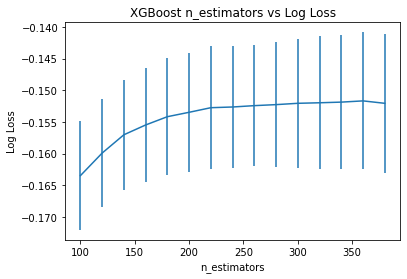

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

model = XGBClassifier(learning_rate =0.1, 
 n_estimators=340, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, seed=27)

n_estimators = range(100,400, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train,Y_train)

XGBest = grid_search.best_estimator_

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
 
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

In [ ]:
XGBest

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=None, n_estimators=360, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

model = XGBClassifier(learning_rate =0.1, 
 n_estimators=360, max_depth=5,
 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=2, scale_pos_weight=1, 
 reg_alpha=1, reg_lambda=1, booster='gbtree',
 colsample_bylevel = 0.8)

model.fit(X_train, Y_train, verbose=False)

XGB_best = model.best_estimator_

# Performance sur le train
train_y_pred = model.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = model.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)

XGB_best

Performance sur le train :  0.8684476860210968
Performance sur le test :  0.8069845936904636


In [ ]:
model.predict(test)

array([1, 1, 1, ..., 1, 1, 1])

ExtraTree

In [ ]:
ext_clf = ExtraTreesClassifier()

param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False, True],
              "n_estimators" :[50,100,200],
              "criterion": ["gini"]}

# Cross validate model with Kfold stratified cross val
#kfold = StratifiedKFold(n_splits=10)
grid_ext_clf = GridSearchCV(ext_clf,param_grid, cv=skfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_ext_clf.fit(X_train, Y_train)

grid_ext_clf.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.9min finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [ ]:
grid_ext_pred = grid_ext_clf.predict(X_test).astype(int)

grid_ext_scores = (grid_ext_clf.best_score_ + accuracy_score (grid_ext_pred, Y_test))/2
grid_ext_scores

0.9513535508097327

In [ ]:
ext_clf = ExtraTreesClassifier(bootstrap=False,
 criterion = 'gini',
 max_depth = None,
 min_samples_leaf = 1,
 min_samples_split= 3,
 n_estimators = 50)

ext_clf.fit(X_train, Y_train)

# Performance sur le train
train_y_pred = ext_clf.predict(X_train)
auc = roc_auc_score(Y_train, train_y_pred)
print("Performance sur le train : ", auc)

# Performance sur le test
test_y_pred = ext_clf.predict(X_test)
auc = roc_auc_score(Y_test, test_y_pred)
print("Performance sur le test : ", auc)

Performance sur le train :  1.0
Performance sur le test :  0.7970442487611449


In [ ]:
ext_clf.predict(test)

array([1, 0, 1, ..., 1, 1, 1])

Gradient boost

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=rnd_state)

param_grid = {
              'n_estimators' : [100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
              'max_features': [5,7] 
              }
grid_gb_clf = GridSearchCV(gb_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_gb_clf.fit(X_train, Y_train)

gb_pred = grid_gb_clf.predict(X_test).astype(int)
grid_gb_scores = (grid_gb_clf.best_score_ + accuracy_score (gb_pred, Y_test))/2

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 15.1min finished


In [ ]:
GRIDBest = grid_gb_clf.best_estimator_
GRIDBest

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=)

In [ ]:
gb_clf.predict(test)

Adaboost

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(random_state=rnd_state, max_depth=2),
    random_state = rnd_state)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[100, 200, 250],
              "learning_rate":  [0.05, 0.1, 0.5]}

grid_ada_clf = GridSearchCV(ada_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ada_clf.fit(X_train, Y_train)
grid_ada_clf.best_params_

ADABest = grid_ada_clf.best_estimator_

ada_pred = grid_ada_clf.predict(X_test).astype(int)
grid_ada_scores = (grid_ada_clf.best_score_ + accuracy_score (ada_pred, Y_test))/2
grid_ada_scores

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  9.8min finished


0.9474603182672381

In [ ]:
ADABest

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
ada_clf = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.5, n_estimators=200, random_state=42)

ada_clf.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
result = ada_clf.predict(test)

In [ ]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('xgb', XGBest),
 ('adac',ADABest),('gbc',GRIDBest)], voting='soft', n_jobs=2)

votingC = votingC.fit(X_train, Y_train)

In [ ]:
test_results = pd.Series(votingC.predict(test), name="Survived")

test_results

0       1
1       0
2       1
3       1
4       1
       ..
8571    1
8572    1
8573    1
8574    1
8575    1
Name: Survived, Length: 8576, dtype: int64

In [ ]:
test_csv_2 = pd.read_csv('/content/test.csv')
summission = pd.concat([test_csv_2['tripid'], pd.DataFrame(result)], axis=1)
summission.columns = ['tripid', 'prediction']
summission.to_csv('submission_ada.csv', encoding='utf-8', index = False)